In [1]:
import numpy as np
import pandas as pd
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.signal import savgol_coeffs

In [2]:
def filter_coef(num_dados, grau, derivada=0):
    assert num_dados % 2 ==1
    M = (num_dados - 1)/2
    
    A = np.zeros((num_dados, grau), np.float64)

    for n in range(A.shape[0]):
        for i in range(A.shape[1]):
            A[n, i] = (n-M)**i

    H = np.linalg.inv(A.transpose() @ A) @ A.transpose()

    h = H[derivada, :]*factorial(derivada)
    return h

#def filter_coef(num_dados, grau, derivada=0):
#    return savgol_coeffs(window_length=num_dados,
#                         polyorder=grau,
#                         deriv=derivada)

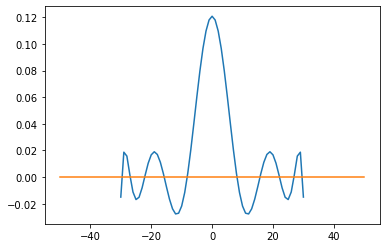

In [3]:
h1 = filter_coef(61, 12)
h2 = savgol_coeffs(101, 12)

x1 = np.arange(- (len(h1)/2 - 0.5), (len(h1)/2 - 0.5) + 1)
x2 = np.arange(- (len(h2)/2 - 0.5), (len(h2)/2 - 0.5) + 1)
plt.plot(x1, h1)
plt.plot(x2, h2)

In [4]:
(A.transpose() @ A).max()

NameError: name 'A' is not defined

In [ ]:
fig, ax = plt.subplots()
ax.imshow(A)

# Frequency response

In [5]:
M = 7
N_min = 0
N_max = 12
impulse = np.array([int(i==0) for i in range(-2000, 2000)])

In [6]:

df = pd.DataFrame()
for N in range(N_min, np.min([M-1, N_max]), 2):
    num_dados = 2*M + 1
    grau = N + 1

    h = filter_coef(num_dados=num_dados, grau=grau)
    res = np.convolve(impulse, h)
    

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    h_db = 10*np.log(np.abs(h))
    

    _df = pd.DataFrame({"freq": f*2,
                        "h_db": h_db})
    _df["N"] = N
    _df["M"] = M
    df = pd.concat([df, _df], ignore_index=True)

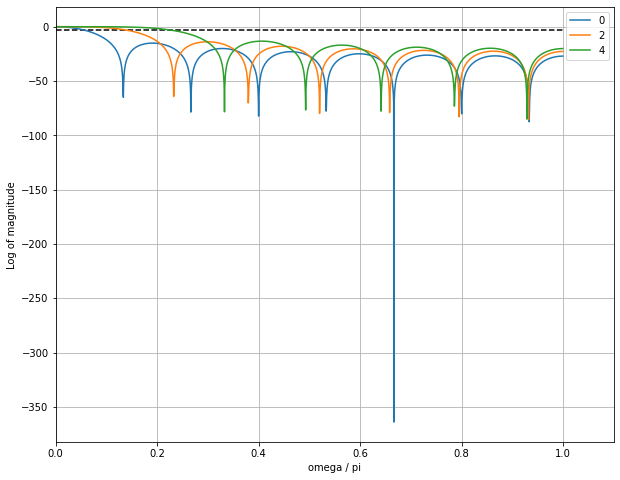

In [7]:
plt.figure(figsize=(10, 8))
plt.hlines(y=-3, xmin=0, xmax=df.freq.max(), linestyle="dashed", color="black")
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq, group.h_db, label = N)
    
plt.legend()
plt.ylabel("Log of magnitude")
plt.xlabel("omega / pi")
plt.xlim(left=0)
plt.grid()
plt.show()

In [8]:
df[df.M==197][df.N==63][df.freq >= 0]

<ipython-input-8-1125f29a67c1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.M==197][df.N==63][df.freq >= 0]
<ipython-input-8-1125f29a67c1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.M==197][df.N==63][df.freq >= 0]


,freq,h_db,N,M


# Primeira ordem

In [9]:

df = pd.DataFrame()
for N in range(N_min+1, np.min([M-1, N_max]), 2):
    num_dados = 2*M + 1
    grau = N + 1
    print(num_dados, grau)
    h = filter_coef(num_dados=int(num_dados), grau=int(grau), derivada=1)
    res = np.convolve(impulse, h)

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    h_db = 10*np.log(np.abs(h))
    

    _df = pd.DataFrame({"freq": f*2,
                        "h_db": h_db,
                        "h"   : h})
    _df["N"] = N
    _df["M"] = M
    df = pd.concat([df, _df], ignore_index=True)

15 2
15 4
15 6


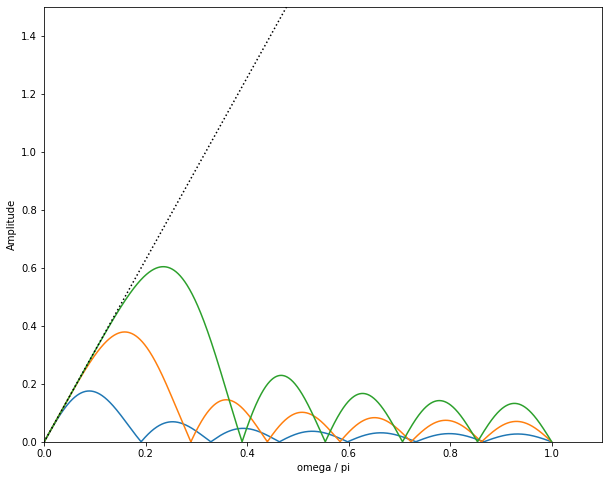

In [10]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq, np.exp(group.h_db/10), label = group.N)
    
plt.plot(group.freq, group.freq*np.pi, color="black", linestyle="dotted")
plt.ylabel("Amplitude")
plt.xlabel("omega / pi")
plt.xlim(left=0)
plt.ylim(bottom=0, top=1.5)
plt.show()

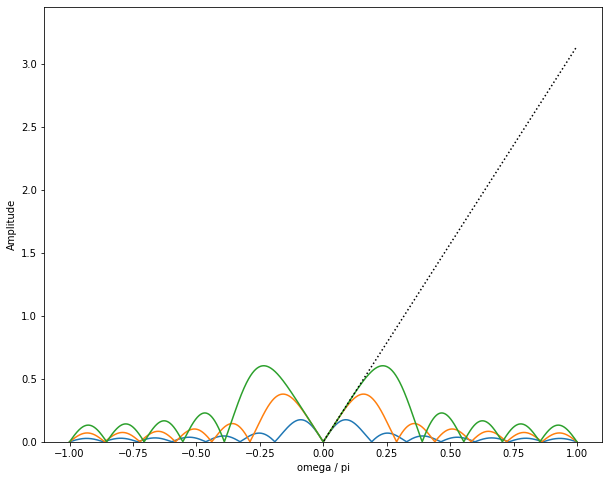

In [11]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq, np.abs(group.h), label = group.N)
    
plt.plot(group.freq, group.freq*np.pi, color="black", linestyle="dotted")
plt.ylabel("Amplitude")
plt.xlabel("omega / pi")
#plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

/home/felipeangelim/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/felipeangelim/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/felipeangelim/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


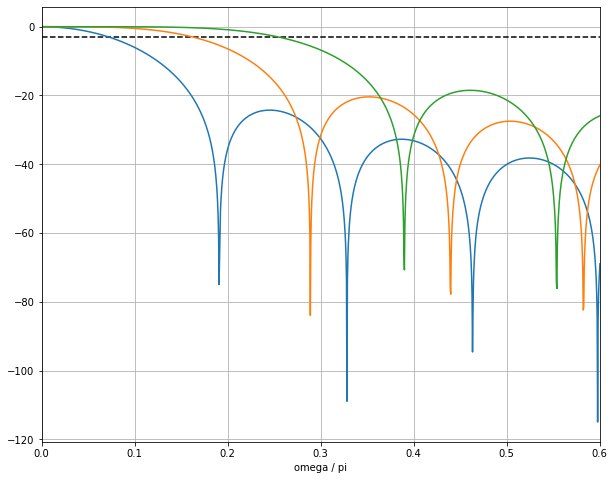

In [12]:
plt.figure(figsize=(10, 8))
plt.hlines(y=-3, xmin=0, xmax=df.freq.max(), linestyle="dashed", color="black")

for (N, M), group in df.groupby(["N", "M"]):
    ratio = np.exp(group.h_db/10)/(group.freq*np.pi)
    
    plt.plot(group.freq, 10*np.log(ratio), label = group.N)
    

#plt.plot(group.freq, , color="black", linestyle="dotted")
plt.xlabel("omega / pi")
#plt.ylim(bottom=0, top=0.6)
plt.xlim(left=0, right=0.6)
plt.grid()
plt.show()

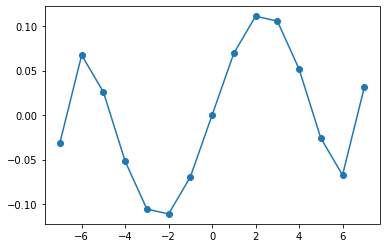

In [13]:
h = filter_coef(num_dados=num_dados, grau=grau, derivada=1)
M = h.shape[0]/2 - 0.5
plt.scatter(np.arange(-M, M+1, 1), h)
plt.plot(np.arange(-M, M+1, 1), h)

# 2a ordem

In [14]:

df = pd.DataFrame()
for N in range(N_min+2, int(np.min([M-1, N_max])), 2):
    num_dados = int(2*M + 1)
    grau = int(N + 1)

    h = filter_coef(num_dados=int(num_dados), grau=int(grau), derivada=2)
    res = np.convolve(impulse, h)

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    h_db = 10*np.log(np.abs(h))
    

    _df = pd.DataFrame({"freq": f*2,
                        "h_db": h_db})
    _df["N"] = N
    _df["M"] = M
    df = pd.concat([df, _df], ignore_index=True)

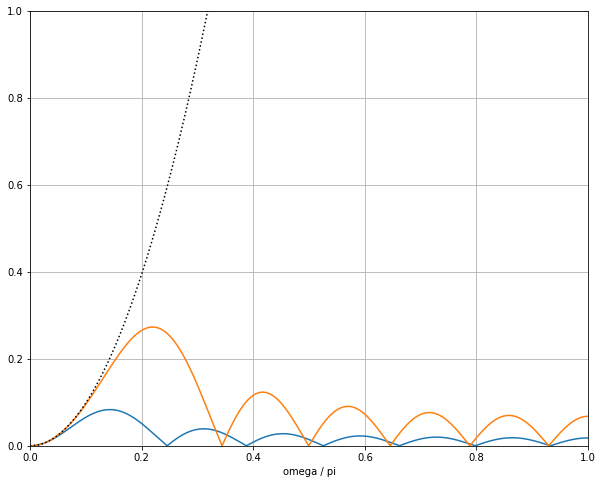

In [15]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq, np.exp(group.h_db/10), label = group.N)
    
    
plt.plot(group.freq, np.square(group.freq*np.pi), color="black", linestyle="dotted")
plt.xlabel("omega / pi")
plt.ylim(bottom=0, top=1)
plt.xlim(left=0, right=1)
plt.grid()
plt.show()

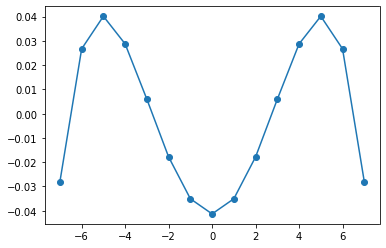

In [16]:
h = filter_coef(num_dados=num_dados, grau=grau, derivada=2)
M = h.shape[0]/2 - 0.5
plt.scatter(np.arange(-M, M+1, 1), h)
plt.plot(np.arange(-M, M+1, 1), h)

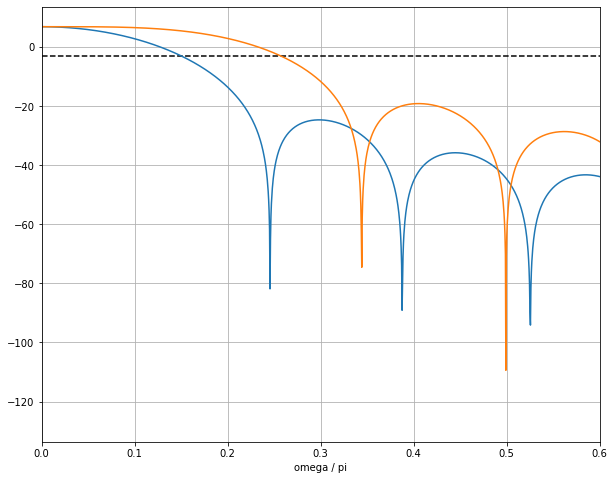

In [19]:
plt.figure(figsize=(10, 8))
plt.hlines(y=-3, xmin=0, xmax=df.freq.max(), linestyle="dashed", color="black")

for (N, M), group in df.groupby(["N", "M"]):
    ratio = np.exp(group.h_db/10)/(np.square(group.freq*np.pi)/2)
    
    plt.plot(group.freq, 10*np.log(ratio), label = group.N)
    

#plt.plot(group.freq, , color="black", linestyle="dotted")
plt.xlabel("omega / pi")
#plt.ylim(bottom=0, top=0.6)
plt.xlim(left=0, right=0.6)
plt.grid()
plt.show()

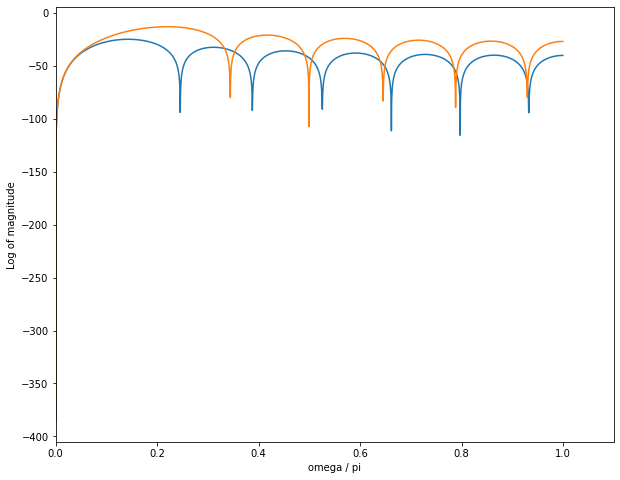

In [20]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq,group.h_db, label = group.N)

plt.ylabel("Log of magnitude")
plt.xlabel("omega / pi")
plt.xlim(left=0)
plt.show()

# Frequencia de cutoff

## Ordem 0

In [21]:
from tqdm import tqdm

In [115]:
df = pd.DataFrame()
impulse_response = np.array([int(i==0) for i in range(-1000, 1001)])
for N in tqdm(range(1, 16, 1)):
    for M in range(N+1, 300, 2):
        num_dados = 2*M + 1
        grau = N + 1

        h = filter_coef(num_dados=num_dados, grau=grau, derivada=0)
        res = np.convolve(impulse_response, h)

        h = fftshift(fft(res))
        f = fftshift(fftfreq(h.shape[0]))
        h_db = 10*np.log10(np.abs(h))


        _df = pd.DataFrame({"freq": f*2,
                            "h_db": h_db,
                            "h"   : h})
        _df["N"] = N
        _df["M"] = M
        df = pd.concat([df, _df], ignore_index=True)

  0%|          | 0/15 [00:00<?, ?it/s]<ipython-input-115-a91d840f5e0e>:13: RuntimeWarning: divide by zero encountered in log10
  h_db = 10*np.log10(np.abs(h))
100%|██████████| 15/15 [01:52<00:00,  7.48s/it]


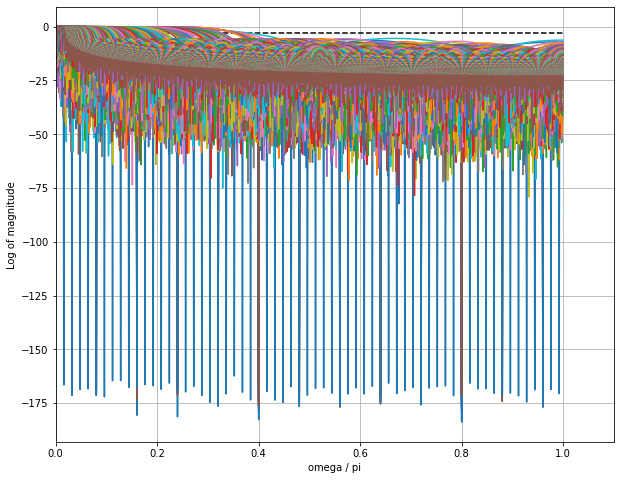

In [116]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq,group.h_db, label = group.N)

    
plt.grid()
plt.hlines(y=-3, xmin=0, xmax=df.freq.max(), linestyle="dashed", color="black")
plt.ylabel("Log of magnitude")
plt.xlabel("omega / pi")
plt.xlim(left=0)
plt.show()

In [117]:
data = []
for (M, N), sel_df in df.groupby(["M", "N"]):
    sel_df = sel_df[sel_df.freq >= 0]
    sel_df = sel_df[sel_df.h_db >= -3]
    data.append({
        "M": M,
        "N": N,
        "freq" : sel_df.freq.max()
    })
    
df_cutoff = pd.DataFrame(data)

In [166]:
df_cutoff.to_csv("df_cutoff_deriv0.csv")
#df_cutoff = pd.read_csv("df_cutoff_deriv0.csv")

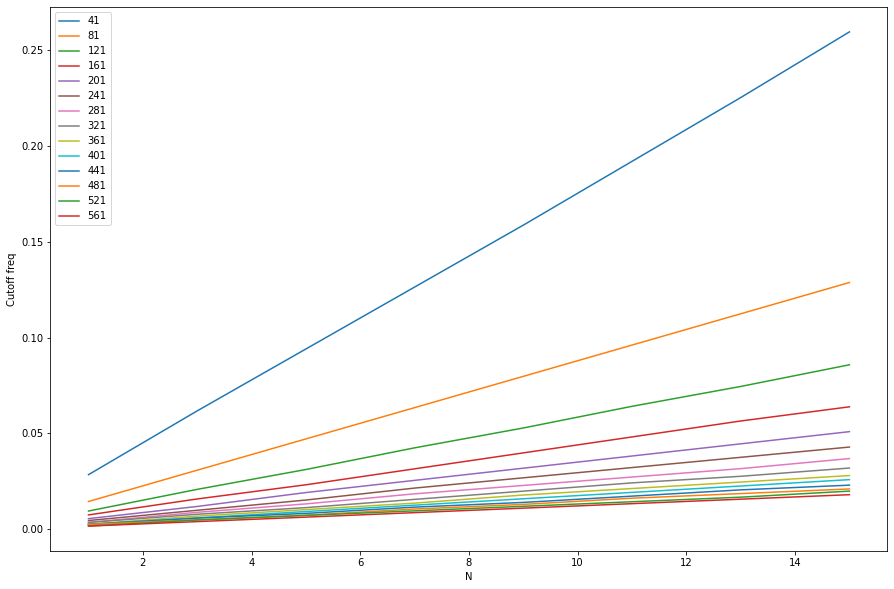

In [167]:
plt.figure(figsize=(15, 10))
for M, group in df_cutoff.groupby("M"):
    if M % 20 == 0:
        plt.plot(group.N.values, group.freq.values, label=2*M + 1)
    

plt.legend()
#plt.ylim(top=0.4)
#plt.xlim(right=20)
plt.ylabel("Cutoff freq")
plt.xlabel("N")
plt.show()

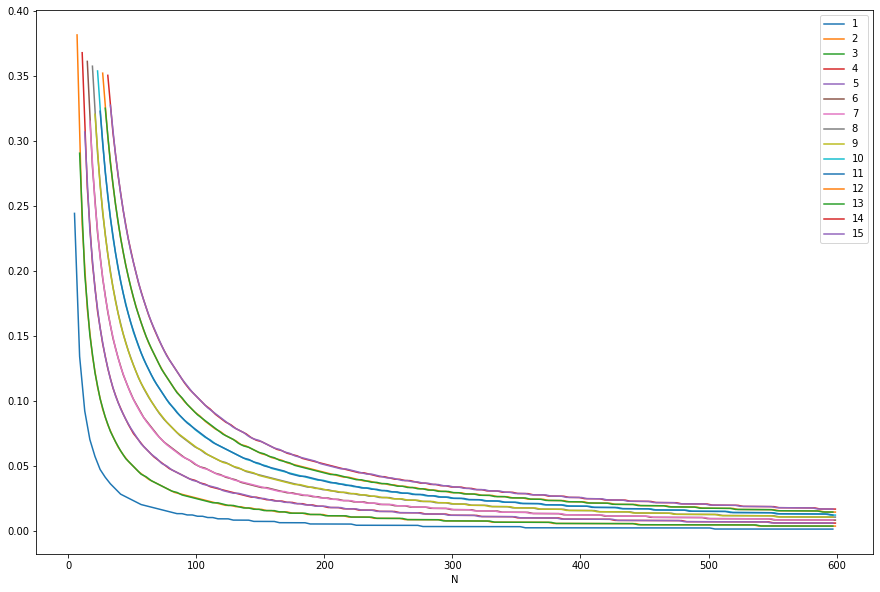

In [168]:
plt.figure(figsize=(15, 10))
for N, group in df_cutoff.groupby("N"):
    plt.plot(group.M*2 + 1, group.freq, label=N)

plt.legend()
plt.xlabel("N")
#plt.ylim(top=0.4)
#plt.xlim(right=20)
plt.show()

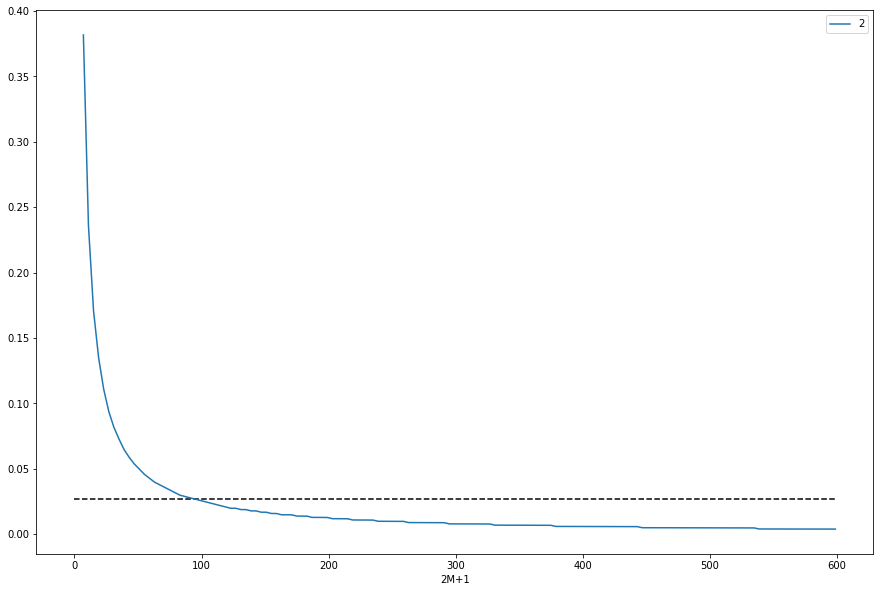

In [169]:
plt.figure(figsize=(15, 10))

max_freq = 69/(1/0.000195)*2

group = df_cutoff[df_cutoff.N == 2]
plt.hlines(y=max_freq, xmin=0, xmax=group.M.max()*2+1, linestyle="dashed", color="black")
plt.plot(group.M*2 + 1, group.freq, label=2)
plt.legend()
plt.xlabel("2M+1")
#plt.ylim(top=0.4)
#plt.xlim(right=20)
plt.show()

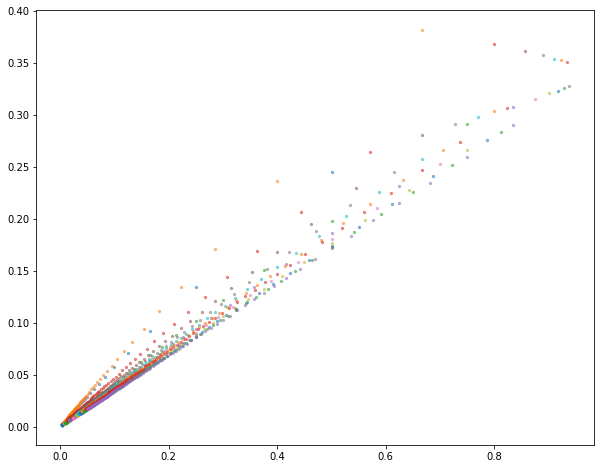

In [121]:
plt.figure(figsize=(10,8))
for N, _df in df_cutoff.groupby("N"):
    plt.scatter(_df.N/_df.M, _df.freq, s=5, label=N, alpha=0.5)
    
#plt.legend()

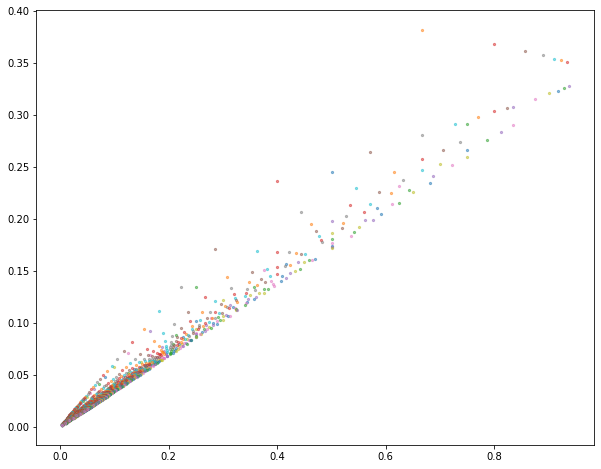

In [122]:
plt.figure(figsize=(10,8))
for M, _df in df_cutoff.groupby("M"):
    plt.scatter(_df.N/(_df.M), _df.freq, s=5, label=M, alpha=0.5)
    
#plt.legend()
plt.show()

## 1a ordem

In [123]:
df = pd.DataFrame()
impulse_response = np.array([int(i==0) for i in range(-1000, 1001)])
for N in tqdm(range(1, 16, 1)):
    for M in range(N+1, 300, 2):
        num_dados = 2*M + 1
        grau = N + 1

        h = filter_coef(num_dados=num_dados, grau=grau, derivada=1)
        res = np.convolve(impulse_response, h)

        h = fftshift(fft(res))
        f = fftshift(fftfreq(h.shape[0]))
        
        
        
        h_db = 10*np.log10(np.abs(h/(f*np.pi)))


        _df = pd.DataFrame({"freq": f*2,
                            "h_db": h_db,
                            "h"   : h})
        _df["N"] = N
        _df["M"] = M
        df = pd.concat([df, _df], ignore_index=True)

  0%|          | 0/15 [00:00<?, ?it/s]<ipython-input-123-467c34fa9cc1>:16: RuntimeWarning: divide by zero encountered in true_divide
  h_db = 10*np.log10(np.abs(h/(f*np.pi)))
<ipython-input-123-467c34fa9cc1>:16: RuntimeWarning: invalid value encountered in true_divide
  h_db = 10*np.log10(np.abs(h/(f*np.pi)))
100%|██████████| 15/15 [01:52<00:00,  7.49s/it]


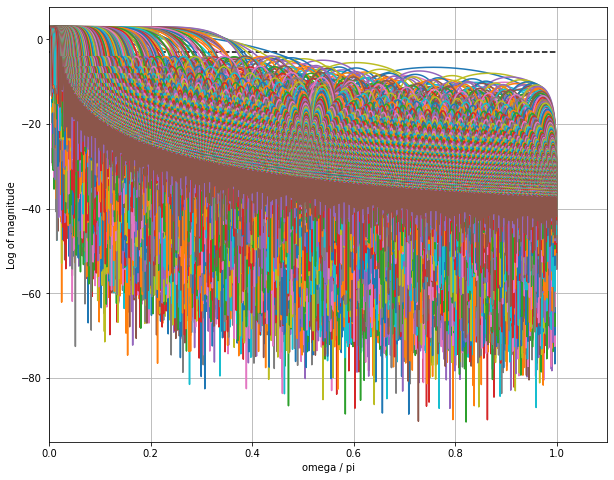

In [124]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq,group.h_db, label = group.N)

    
plt.grid()
plt.hlines(y=-3, xmin=0, xmax=df.freq.max(), linestyle="dashed", color="black")
plt.ylabel("Log of magnitude")
plt.xlabel("omega / pi")
plt.xlim(left=0)
plt.show()

In [125]:
data = []
for (M, N), sel_df in df.groupby(["M", "N"]):
    sel_df = sel_df[sel_df.freq >= 0]
    sel_df = sel_df[sel_df.h_db >= -3]
    data.append({
        "M": M,
        "N": N,
        "freq" : sel_df.freq.max()
    })
    
df_cutoff = pd.DataFrame(data)

In [126]:
df_cutoff.to_csv("df_cutoff_deriv1.csv")

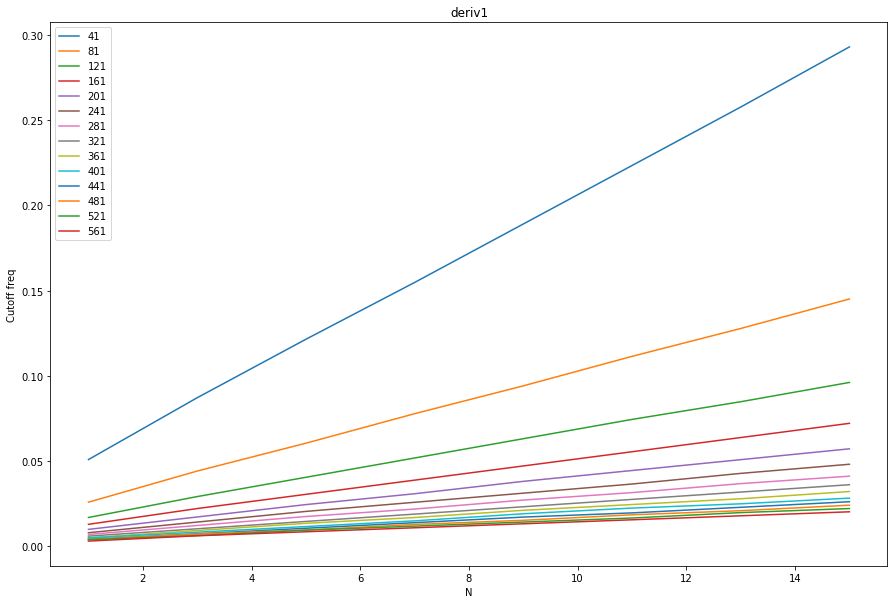

In [127]:
plt.figure(figsize=(15, 10))
for M, group in df_cutoff.groupby("M"):
    if M % 20 == 0:
        plt.plot(group.N.values, group.freq.values, label=2*M + 1)
    

plt.legend()
#plt.ylim(top=0.4)
#plt.xlim(right=20)
plt.ylabel("Cutoff freq")
plt.title("deriv1")
plt.xlabel("N")
plt.show()

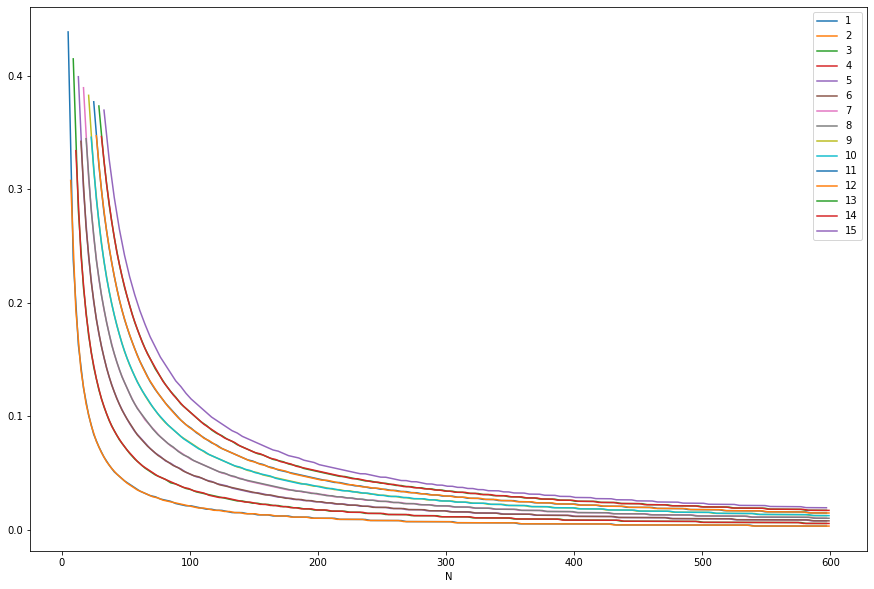

In [128]:
plt.figure(figsize=(15, 10))
for N, group in df_cutoff.groupby("N"):
    plt.plot(group.M*2 + 1, group.freq, label=N)

plt.legend()
plt.xlabel("N")
#plt.ylim(top=0.4)
#plt.xlim(right=20)
plt.show()

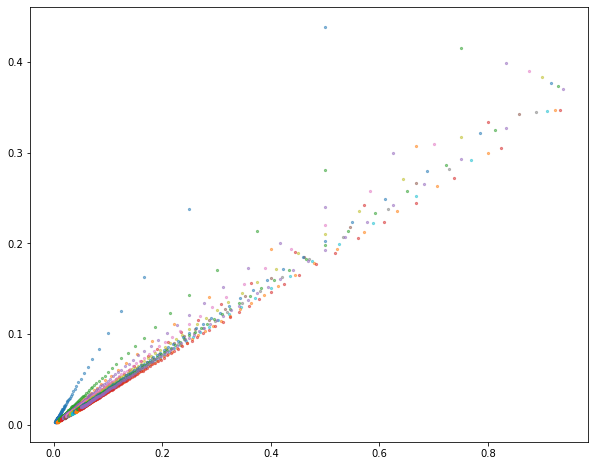

In [129]:
plt.figure(figsize=(10,8))
for N, _df in df_cutoff.groupby("N"):
    plt.scatter(_df.N/(_df.M), _df.freq, s=5, label=N, alpha=0.5)
    
#plt.legend()

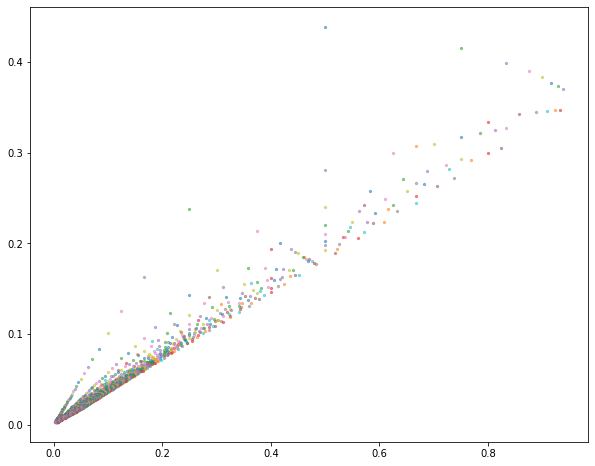

In [130]:
plt.figure(figsize=(10,8))
for M, _df in df_cutoff.groupby("M"):
    plt.scatter(_df.N/(_df.M), _df.freq, s=5, label=M, alpha=0.5)
    
#plt.legend()
plt.show()

## 2a ordem

In [131]:
df = pd.DataFrame()
impulse_response = np.array([int(i==0) for i in range(-1000, 1001)])
for N in tqdm(range(2, 16, 1)):
    for M in range(N+1, 300, 2):
        num_dados = 2*M + 1
        grau = N + 1

        h = filter_coef(num_dados=num_dados, grau=grau, derivada=2)
        res = np.convolve(impulse_response, h)

        h = fftshift(fft(res))
        f = fftshift(fftfreq(h.shape[0]))
        
        
        
        h_db = 10*np.log10(np.abs(h/(f*np.pi)**2))


        _df = pd.DataFrame({"freq": f*2,
                            "h_db": h_db,
                            "h"   : h})
        _df["N"] = N
        _df["M"] = M
        df = pd.concat([df, _df], ignore_index=True)

  0%|          | 0/14 [00:00<?, ?it/s]<ipython-input-131-68786aa083f6>:16: RuntimeWarning: divide by zero encountered in true_divide
  h_db = 10*np.log10(np.abs(h/(f*np.pi)**2))
<ipython-input-131-68786aa083f6>:16: RuntimeWarning: invalid value encountered in true_divide
  h_db = 10*np.log10(np.abs(h/(f*np.pi)**2))
100%|██████████| 14/14 [01:41<00:00,  7.23s/it]


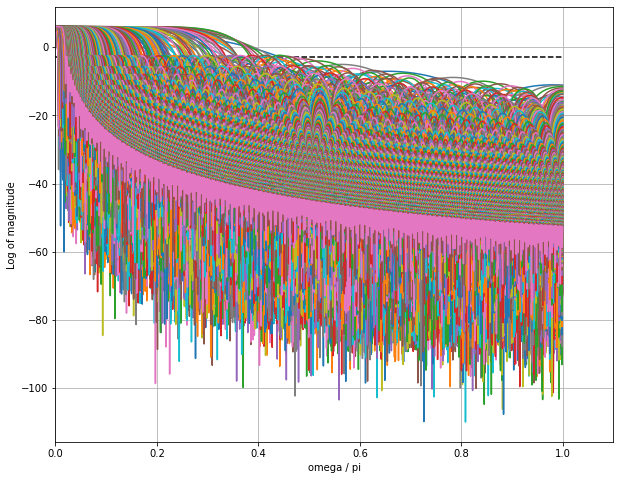

In [132]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq,group.h_db, label = group.N)

    
plt.grid()
plt.hlines(y=-3, xmin=0, xmax=df.freq.max(), linestyle="dashed", color="black")
plt.ylabel("Log of magnitude")
plt.xlabel("omega / pi")
plt.xlim(left=0)
plt.show()

In [162]:
#cutoff_freq = -3
cutoff_freq = -0.01
data = []
for (M, N), sel_df in df.groupby(["M", "N"]):
    sel_df = sel_df[sel_df.freq >= 0]
    sel_df = sel_df[sel_df.h_db >= cutoff_freq]
    data.append({
        "M": M,
        "N": N,
        "freq" : sel_df.freq.max()
    })
    
df_cutoff = pd.DataFrame(data)

In [134]:
df_cutoff.to_csv("df_cutoff_deriv2.csv")

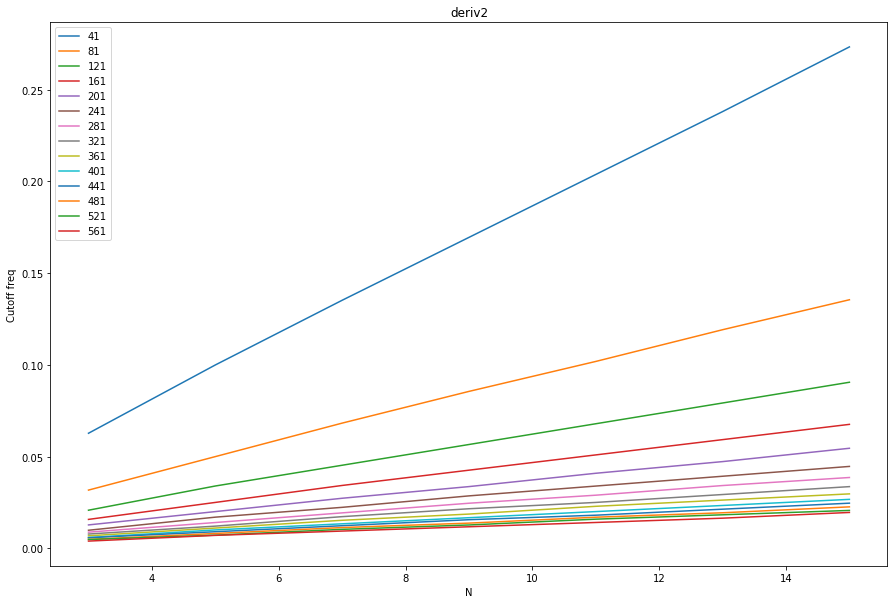

In [163]:
plt.figure(figsize=(15, 10))
for M, group in df_cutoff.groupby("M"):
    if M % 20 == 0:
        plt.plot(group.N.values, group.freq.values, label=2*M + 1)
    

plt.legend()
#plt.ylim(top=0.4)
#plt.xlim(right=20)
plt.ylabel("Cutoff freq")
plt.title("deriv2")
plt.xlabel("N")
plt.show()

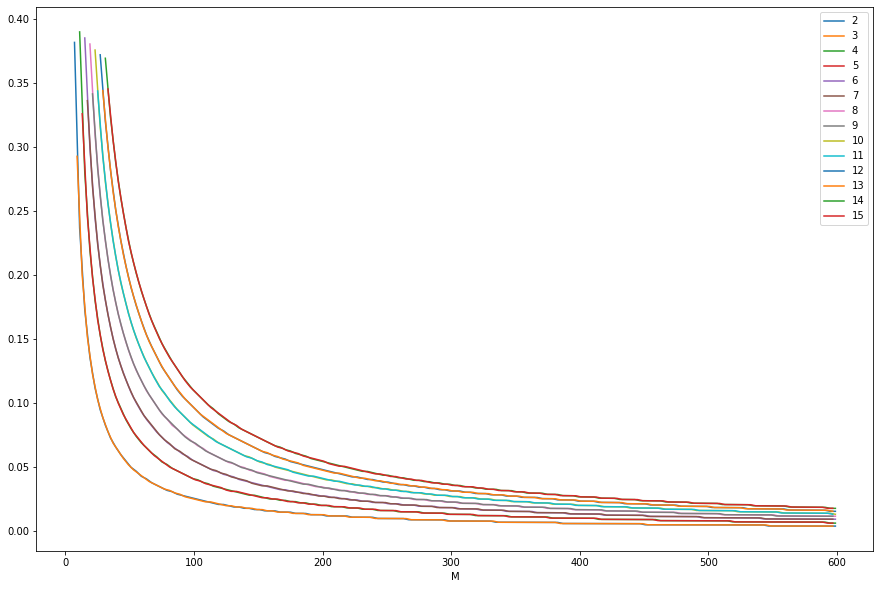

In [164]:
plt.figure(figsize=(15, 10))
for N, group in df_cutoff.groupby("N"):
    plt.plot(group.M*2 + 1, group.freq, label=N)

plt.legend()
plt.xlabel("M")
#plt.ylim(top=0.4)
#plt.xlim(right=20)
plt.show()

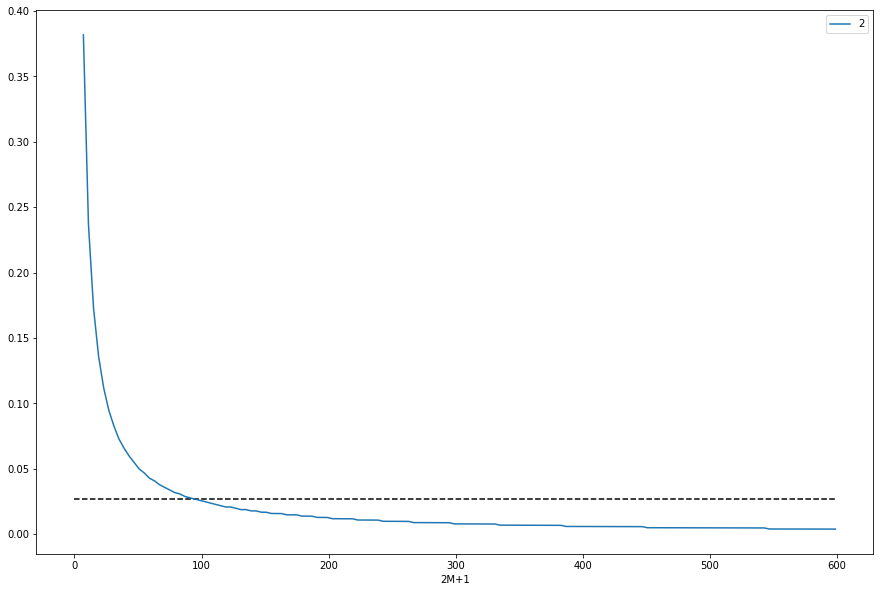

In [165]:
plt.figure(figsize=(15, 10))

max_freq = 69/(1/0.000195)*2

group = df_cutoff[df_cutoff.N == 2]
plt.hlines(y=max_freq, xmin=0, xmax=group.M.max()*2+1, linestyle="dashed", color="black")
plt.plot(group.M*2 + 1, group.freq, label=2)
plt.legend()
plt.xlabel("2M+1")
#plt.ylim(top=0.4)
#plt.xlim(right=20)
plt.show()

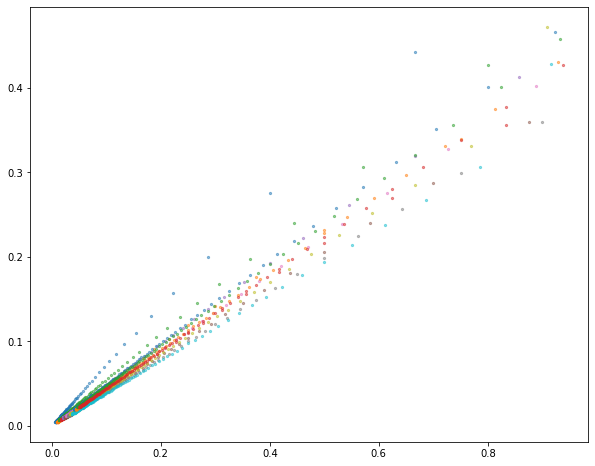

In [137]:
plt.figure(figsize=(10,8))
for N, _df in df_cutoff.groupby("N"):
    plt.scatter(_df.N/(_df.M), _df.freq, s=5, label=N, alpha=0.5)
    
#plt.legend()

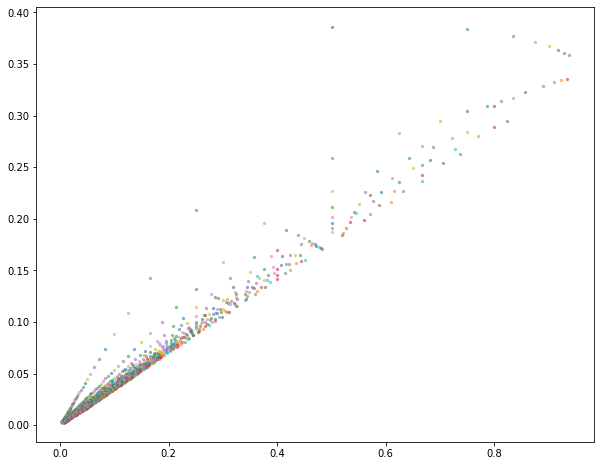

In [99]:
plt.figure(figsize=(10,8))
for M, _df in df_cutoff.groupby("M"):
    plt.scatter(_df.N/(_df.M), _df.freq, s=5, label=M, alpha=0.5)
    
#plt.legend()
plt.show()

In [139]:
(69)/(1/0.000195)*np.pi*2

0.08454025830810133

# Noise

In [64]:
1/35*np.array([-3, 12, 17, 12, -3])

array([-0.08571429,  0.34285714,  0.48571429,  0.34285714, -0.08571429])

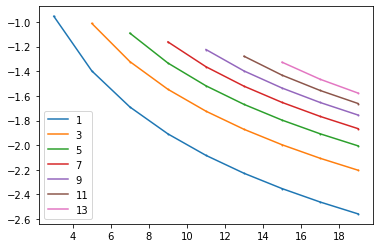

In [80]:
for grau in range(1,15, 2):
    factors = []
    Ns = []
    for i in range(grau+2, 20, 2):

        factor = np.square(filter_coef(num_dados=i,grau=grau)).mean()
        factors.append(factor)
        Ns.append(i)
    plt.plot(Ns, np.log10(factors), label=grau)    
    plt.scatter(Ns, np.log10(factors), s=1)

plt.legend()
plt.show()

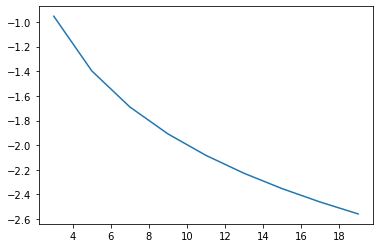

In [61]:
plt.plot(Ns, np.log10(factors)